<a href="https://colab.research.google.com/github/ElisaAma93/Master/blob/master/Booking_scraper_Selenium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scraping su Booking.com

Per cominciare installo e importo le librerie necessarie per il lavoro.

In [ ]:
!pip install selenium   
!apt-get update
!apt install chromium-chromedriver  
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

     |████████████████████████████████| 911kB 2.8MB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:11 https://developer.download.nvidia.com/compute/machine-learning/

In [ ]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from tqdm import tqdm_notebook as tqdm
import pandas
import json
import pprint

Definisco un webdriver da Chrome e gli associo il link della pagina di Booking da cui voglio fare scraping.

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')   
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [ ]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.booking.com/searchresults.it.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaHGIAQGYARS4ARfIAQzYAQHoAQH4AQuIAgGoAgO4ApzakPgFwAIB0gIkZGU3ZDYxMDMtZTQ1OC00Y2E2LTkxM2EtZTViNTJlYzk0NWU52AIG4AIB&sid=f7fc04c8a03b4db3566a73d422abcde1&tmpl=searchresults&ac_click_type=b&ac_position=0&checkin_month=8&checkin_monthday=31&checkin_year=2020&checkout_month=9&checkout_monthday=6&checkout_year=2020&class_interval=1&dest_id=910&dest_type=region&from_sf=1&group_adults=2&group_children=0&label_click=undef&nflt=class%3D3%3B&no_rooms=1&raw_dest_type=region&room1=A%2CA&sb_price_type=total&search_selected=1&shw_aparth=1&slp_r_match=0&src=index&srpvid=ff6f391d537100b9&ss=Toscana%2C%20Italia&ss_raw=tos&ssb=empty&top_ufis=1&rows=25&offset=")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


Definisco la lista degli hotel di una pagina.

In [ ]:
list_hotel = wd.find_elements_by_css_selector("div.sr_item")
print(len(list_hotel))

25


In [ ]:
print(list_hotel[0].text)

Si apre in una nuova finestra
Hotel La Scaletta
Si apre in una nuova finestra
Hotel a 3 stelle
San Frediano, Firenze Mostra sulla mappa
8,8
Favoloso
1.310 recensioni
Si apre in una nuova finestra
Pulizia 9,1
Camera Matrimoniale Economy  - 
N° max persone: 2
1 letto matrimoniale alla francese
Restano solo 2 camere come questa sul nostro sito
6 notti, 2 adulti
US$1.099 US$657
Prezzo iniziale US$1.099 Prezzo attuale US$657
Scegli la tua camera


Estraggo le informazioni sugli hotel da più pagine.

Identifico la lista dei nomi degli hotel in una pagina.

In [ ]:
list_title = wd.find_elements_by_css_selector(".sr-hotel__name")
#print(len(list_h3))
#print(list_h3[0].text)

for title in list_title:
  print(title.text)

Hotel La Scaletta
Hotel Barberino
Antico Borgo San Martino
Hotel Il Pietreto
Borgo al Cielo - Albergo Diffuso
Albergo Battelli
La Loggia - Villa Gloria
Hotel Bel Tramonto
Hotel Central Park
Villa Aurora di Ferracciano
Casa Vacanze Albachiara
Hotel Rombino
Albergo da Annita
Hotel Il Settebello
Albergo San Lorenzo
Hotel l'Approdo
Hotel Porta Faenza
Hotel Alpino
Hotel Sirena
Hotel Coluccini
Residenza Sangallo
Hotel Sole E Mare
Hotel Villa San Giorgio
Hotel Club I Pini - Residenza D'Epoca
Hotel Venezia


Definisco le variabili che voglio scaricare.

In [ ]:
import pprint
detail_hotel = []
for hotel in list_hotel:
  title = hotel.find_elements_by_css_selector(".sr-hotel__name")[0].text
  url = hotel.find_elements_by_css_selector(".hotel_name_link")[0].get_attribute("href")
  city = hotel.find_elements_by_css_selector("a.bui-link")[0].text
  room_description = hotel.find_elements_by_css_selector("div.room_link")[0].text
  price = hotel.find_elements_by_css_selector("div.bui-price-display__value")[0].text
  evaluation_description = ""
  if (len(hotel.find_elements_by_css_selector("div.bui-review-score__title")) > 0):
    evaluation_description = hotel.find_elements_by_css_selector("div.bui-review-score__title")[0].text
  reviews = ""
  if (len(hotel.find_elements_by_css_selector("div.bui-review-score__text")) > 0):
    reviews = hotel.find_elements_by_css_selector("div.bui-review-score__text")[0].text
  score_position = ""
  if (len(hotel.find_elements_by_css_selector("span.review-score-widget")) > 0):
    score_position = hotel.find_elements_by_css_selector("span.review-score-widget")[0].text
  
  
  evaluation = hotel.get_attribute("data-score")
  hotel_id = hotel.get_attribute("data-hotelid")
 
  detail_hotel.append({'title': title,
                          'url' : url,
                          'price' : price,
                          'city' : city,
                          'evaluation_description' : evaluation_description,
                          'evaluation' : evaluation,
                          'reviews' : reviews,
                          'room_description' : room_description,
                          'score_position' : score_position,
                          'hotel_id' : hotel_id})
                          
                           
len(detail_hotel)
pprint.pprint(detail_hotel)

[{'city': 'San Frediano, Firenze Mostra sulla mappa',
  'evaluation': '8,8',
  'evaluation_description': 'Favoloso',
  'hotel_id': '85406',
  'price': 'US$657',
  'reviews': '1.310 recensioni',
  'room_description': 'Camera Matrimoniale Economy  - \nN° max persone: 2',
  'score_position': 'Pulizia 9,1',
  'title': 'Hotel La Scaletta',
  'url': 'https://www.booking.com/hotel/it/la-scaletta.it.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaHGIAQGYARS4ARfIAQzYAQHoAQH4AQuIAgGoAgO4ApzakPgFwAIB0gIkZGU3ZDYxMDMtZTQ1OC00Y2E2LTkxM2EtZTViNTJlYzk0NWU52AIG4AIB&sid=f7dec976d7a9095bed15035b70e2100f&all_sr_blocks=8540606_91907635_0_2_0&checkin=2020-08-31&checkout=2020-09-06&dest_id=910&dest_type=region&group_adults=2&group_children=0&hapos=1&highlighted_blocks=8540606_91907635_0_2_0&hpos=1&nflt=class%3D3%3B&no_rooms=1&sr_order=popularity&sr_pri_blocks=8540606_91907635_0_2_0__58039&srepoch=1594283088&srpvid=bc673b28d68d01dd&ucfs=1&from=searchresults;highlight_room=#hotelTmpl'},
 {'city': 'Barberino 

In [ ]:
def parse_hotel(hotel):
  hotel_id = hotel.get_attribute("data-hotelid")
  title = ""
  url = ""
  city = ""
  room_description = ""
  evaluation = ""
  score_position = ""
  price = ""
  
  try:   
    title = hotel.find_elements_by_css_selector(".sr-hotel__name")[0].text
    url = hotel.find_elements_by_css_selector(".hotel_name_link")[0].get_attribute("href")
    city = hotel.find_elements_by_css_selector("a.bui-link")[0].text
    room_description = hotel.find_elements_by_css_selector("div.room_link")[0].text
    price = hotel.find_elements_by_css_selector("div.bui-price-display__value")[0].text
    evaluation = hotel.get_attribute("data-score")
    evaluation_description = ""
    if (len(hotel.find_elements_by_css_selector("div.bui-review-score__title")) > 0):
      evaluation_description = hotel.find_elements_by_css_selector("div.bui-review-score__title")[0].text
    reviews = ""
    if (len(hotel.find_elements_by_css_selector("div.bui-review-score__text")) > 0):
      reviews = hotel.find_elements_by_css_selector("div.bui-review-score__text")[0].text
    score_position = ""
    if (len(hotel.find_elements_by_css_selector("span.review-score-widget")) > 0):
      score_position = hotel.find_elements_by_css_selector("span.review-score-widget")[0].text
    cancellazione_gratuita = ""
    if (len(hotel.find_elements_by_css_selector("sup.sr_room_reinforcement.sr_room_policy_single_line")) > 0):
      cancellazione_gratuita = hotel.find_elements_by_css_selector("sup.sr_room_reinforcement.sr_room_policy_single_line")[0].text
    
  except:
     pass
  return {'title': title,
          'url' : url,
          'room_description' : room_description,
          'city' : city,
          'evaluation' : evaluation,
          'evaluation_description' : evaluation_description,
          'reviews' : reviews,
          'cancellazione_gratuita' : cancellazione_gratuita,
          'score_position' : score_position,
          'price' : price,
          'hotel_id' : hotel_id}


Scarico le informazioni che mi interessano da più pagine e le salvo in un file csv.

In [ ]:
detail_hotel = []
for num in tqdm(range(0, 26, 25)):
  wd.get(f"https://www.booking.com/searchresults.it.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaHGIAQGYARS4ARfIAQzYAQHoAQH4AQuIAgGoAgO4ApzakPgFwAIB0gIkZGU3ZDYxMDMtZTQ1OC00Y2E2LTkxM2EtZTViNTJlYzk0NWU52AIG4AIB&sid=f7fc04c8a03b4db3566a73d422abcde1&tmpl=searchresults&ac_click_type=b&ac_position=0&checkin_month=7&checkin_monthday=27&checkin_year=2020&checkout_month=8&checkout_monthday=16&checkout_year=2020&class_interval=1&dest_id=910&dest_type=region&from_sf=1&group_adults=2&group_children=0&label_click=undef&nflt=class%3D3%3B&no_rooms=1&raw_dest_type=region&room1=A%2CA&sb_price_type=total&search_selected=1&shw_aparth=1&slp_r_match=0&src=index&srpvid=ff6f391d537100b9&ss=Toscana%2C%20Italia&ss_raw=tos&ssb=empty&top_ufis=1&rows=25&offset={num}")
  wd.save_screenshot(f'screenshot_{num}.png')
  list_hotel = wd.find_elements_by_css_selector("div.sr_item")
  for hotel in list_hotel:
      detail_hotel.append(parse_hotel(hotel))

print(len(detail_hotel))
detail_hotel

In [ ]:
import time
detail_hotel = []
for num in tqdm(range(0,251, 25)):
    time.sleep(1)
    wd.get(f"https://www.booking.com/searchresults.it.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaHGIAQGYARS4ARfIAQzYAQHoAQH4AQuIAgGoAgO4ApzakPgFwAIB0gIkZGU3ZDYxMDMtZTQ1OC00Y2E2LTkxM2EtZTViNTJlYzk0NWU52AIG4AIB&sid=f7fc04c8a03b4db3566a73d422abcde1&tmpl=searchresults&ac_click_type=b&ac_position=0&checkin_month=8&checkin_monthday=31&checkin_year=2020&checkout_month=9&checkout_monthday=6&checkout_year=2020&class_interval=1&dest_id=910&dest_type=region&from_sf=1&group_adults=2&group_children=0&label_click=undef&nflt=class%3D3%3B&no_rooms=1&raw_dest_type=region&room1=A%2CA&sb_price_type=total&search_selected=1&shw_aparth=1&slp_r_match=0&src=index&srpvid=ff6f391d537100b9&ss=Toscana%2C%20Italia&ss_raw=tos&ssb=empty&top_ufis=1&rows=25&offset={num}")
    #wd.save_screenshot(f'screenshot_{num}.png')
    list_hotel = wd.find_elements_by_css_selector("div.sr_item")
    for hotel in list_hotel:
      detail_hotel.append(parse_hotel(hotel))

print(len(detail_hotel))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



297


In [ ]:
import pandas as pd
ds_detail_hotel = pd.DataFrame(detail_hotel)
ds_detail_hotel.set_index("hotel_id")
ds_detail_hotel.head()

,title,url,room_description,city,evaluation,evaluation_description,reviews,cancellazione_gratuita,score_position,price,hotel_id
0,B&B Relais Inn Lucca,https://www.booking.com/hotel/it/relais-inn-lu...,Camera Matrimoniale/Doppia con Letti Singoli ...,"Centro storico, Lucca Mostra sulla mappa","9,1",Eccellente,478 recensioni,Cancellazione GRATUITA,"Pulizia 9,3",US$611,1005093
1,Hotel Barberino,https://www.booking.com/hotel/it/barberino-500...,Camera Matrimoniale - \nN° max persone: 2,Barberino di Mugello Mostra sulla mappa,"8,4",Ottimo,354 recensioni,Cancellazione GRATUITA,,US$523,355785
2,Antico Borgo San Martino,https://www.booking.com/hotel/it/antico-borgo-...,Camera Matrimoniale Classic - \nN° max person...,Riparbella Mostra sulla mappa,"8,1",Ottimo,537 recensioni,Cancellazione GRATUITA,,US$466,84602
3,Albergo Battelli,https://www.booking.com/hotel/it/albergo-batte...,Camera Doppia con Letti Singoli - \nN° max pe...,Marina di Pietrasanta Mostra sulla mappa,"8,9",Favoloso,277 recensioni,Cancellazione GRATUITA,"Pulizia 9,1",US$639,371788
4,Loft Bellavista Volterra,https://www.booking.com/hotel/it/loft-bellavis...,Appartamento con 1 Camera da Letto - \nN° max...,Volterra Mostra sulla mappa,10,Eccezionale,6 recensioni,Cancellazione GRATUITA,Pulizia 10,US$557,4570926


In [ ]:
ds_detail_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   297 non-null    object
 1   url                     297 non-null    object
 2   room_description        297 non-null    object
 3   city                    297 non-null    object
 4   evaluation              297 non-null    object
 5   evaluation_description  297 non-null    object
 6   reviews                 297 non-null    object
 7   cancellazione_gratuita  297 non-null    object
 8   score_position          297 non-null    object
 9   price                   297 non-null    object
 10  hotel_id                297 non-null    object
dtypes: object(11)
memory usage: 25.6+ KB


In [ ]:
ds_detail_hotel.to_csv('ds_hotel_agosto1.csv')

In [ ]:
# open csv file
import pandas as pd
ds_detail_hotel = pd.read_csv("ds_hotel_agosto1.csv", index_col="hotel_id")
ds_detail_hotel.head()

,Unnamed: 0,title,url,room_description,city,evaluation,evaluation_description,reviews,score_position,price
hotel_id,,,,,,,,,,
82855,0,Airone Pisa Park Hotel,https://www.booking.com/hotel/it/aironepisapar...,Camera Matrimoniale/Doppia con Letti Singoli ...,Pisa Mostra sulla mappa,"7,5",Buono,899 recensioni,NaN,US$441
4944541,1,Ladybug Apartment,https://www.booking.com/hotel/it/ladybug-apart...,Appartamento con 1 Camera da Letto - \nN° max...,Poggibonsi Mostra sulla mappa,9,Eccellente,26 recensioni,"Pulizia 9,3",US$278
88393,2,Hotel Scilla,https://www.booking.com/hotel/it/scilla-e-loca...,Camera Matrimoniale Economy - Dependance - \n...,Sovana Mostra sulla mappa,"8,4",Ottimo,631 recensioni,NaN,US$385
355785,3,Hotel Barberino,https://www.booking.com/hotel/it/barberino-500...,Camera Matrimoniale - \nN° max persone: 2,Barberino di Mugello Mostra sulla mappa,"8,4",Ottimo,354 recensioni,NaN,US$519
480073,4,Hotel San Marco,https://www.booking.com/hotel/it/san-marco-pra...,Camera Matrimoniale - \nN° max persone: 2,Prato Mostra sulla mappa,"8,9",Favoloso,378 recensioni,"Pulizia 9,1",US$304


In [ ]:
ds_detail_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 82855 to 572284
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              295 non-null    int64 
 1   title                   295 non-null    object
 2   url                     295 non-null    object
 3   room_description        295 non-null    object
 4   city                    295 non-null    object
 5   evaluation              290 non-null    object
 6   evaluation_description  290 non-null    object
 7   reviews                 290 non-null    object
 8   score_position          187 non-null    object
 9   price                   295 non-null    object
dtypes: int64(1), object(9)
memory usage: 25.4+ KB


Estraggo le pagine di dettaglio.
Per cominciare scarico gli indirizzi degli hotel.

In [ ]:
# open csv file
import pandas as pd
ds_detail_hotel = pd.read_csv("ds_hotel_agosto1.csv", index_col="hotel_id")
ds_detail_hotel.head()

,Unnamed: 0,title,url,room_description,city,evaluation,evaluation_description,reviews,score_position,price
hotel_id,,,,,,,,,,
82855,0,Airone Pisa Park Hotel,https://www.booking.com/hotel/it/aironepisapar...,Camera Matrimoniale/Doppia con Letti Singoli ...,Pisa Mostra sulla mappa,"7,5",Buono,899 recensioni,NaN,US$441
4944541,1,Ladybug Apartment,https://www.booking.com/hotel/it/ladybug-apart...,Appartamento con 1 Camera da Letto - \nN° max...,Poggibonsi Mostra sulla mappa,9,Eccellente,26 recensioni,"Pulizia 9,3",US$278
88393,2,Hotel Scilla,https://www.booking.com/hotel/it/scilla-e-loca...,Camera Matrimoniale Economy - Dependance - \n...,Sovana Mostra sulla mappa,"8,4",Ottimo,631 recensioni,NaN,US$385
355785,3,Hotel Barberino,https://www.booking.com/hotel/it/barberino-500...,Camera Matrimoniale - \nN° max persone: 2,Barberino di Mugello Mostra sulla mappa,"8,4",Ottimo,354 recensioni,NaN,US$519
480073,4,Hotel San Marco,https://www.booking.com/hotel/it/san-marco-pra...,Camera Matrimoniale - \nN° max persone: 2,Prato Mostra sulla mappa,"8,9",Favoloso,378 recensioni,"Pulizia 9,1",US$304


In [ ]:
ds_detail_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 82855 to 572284
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              295 non-null    int64 
 1   title                   295 non-null    object
 2   url                     295 non-null    object
 3   room_description        295 non-null    object
 4   city                    295 non-null    object
 5   evaluation              290 non-null    object
 6   evaluation_description  290 non-null    object
 7   reviews                 290 non-null    object
 8   score_position          187 non-null    object
 9   price                   295 non-null    object
dtypes: int64(1), object(9)
memory usage: 25.4+ KB


In [ ]:
ds_detail_hotel["url"]

hotel_id
82855      https://www.booking.com/hotel/it/aironepisapar...
4944541    https://www.booking.com/hotel/it/ladybug-apart...
88393      https://www.booking.com/hotel/it/scilla-e-loca...
355785     https://www.booking.com/hotel/it/barberino-500...
480073     https://www.booking.com/hotel/it/san-marco-pra...
                                 ...                        
3240271    https://www.booking.com/hotel/it/nemohouse-mon...
1972372    https://www.booking.com/hotel/it/san-niccolo-w...
4768449    https://www.booking.com/hotel/it/appartamento-...
1166996    https://www.booking.com/hotel/it/oche-firenze2...
572284     https://www.booking.com/hotel/it/relais-martin...
Name: url, Length: 295, dtype: object

In [ ]:
list_title = wd.find_elements_by_css_selector("p.address")
for hotel in list_title:
  if (len(hotel.find_elements_by_css_selector(".hp_address_subtitle")) > 0):
    address = wd.find_elements_by_css_selector(".hp_address_subtitle")[0].text
    print(address)
  else:
    print("errore")

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
details = []
for hotel_id, hotel in tqdm(ds_detail_hotel.head().iterrows()):
    time.sleep(3)
    link = hotel["url"]
    print(link)
    wd.set_window_size(1920, 1080)   #fisso le dimensioni di risoluzione fissa così che il browser nascosto abbia la stessa riduzione del mio locale
    wd.get(link)
    #try:
     # WebDriverWait(wd, 10).until(
      #    EC.element_to_be_clickable((By.ID, "button.txp-sidebar-cta"))
     # )
     
    #except:
    #  continue
    #if (len(wd.find_elements_by_css_selector(".hp_address_subtitle")) > 0):
    address = wd.find_elements_by_css_selector(".hp_address_subtitle")[0].text
    wd.save_screenshot(f'screenshot_{hotel_id}.png')
    
    details.append({'hotel_id': hotel_id,
                    'address': address})
                    
  
len(details)
pprint.pprint(details)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


https://www.booking.com/hotel/it/aironepisaparkhotel.it.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaHGIAQGYARS4ARfIAQzYAQHoAQH4AQuIAgGoAgO4ApzakPgFwAIB0gIkZGU3ZDYxMDMtZTQ1OC00Y2E2LTkxM2EtZTViNTJlYzk0NWU52AIG4AIB&sid=8e9d3bcf83d2e4ddec14b12890cfbfd5&all_sr_blocks=8285501_199864028_0_32_0&checkin=2020-08-03&checkout=2020-08-09&dest_id=910&dest_type=region&group_adults=2&group_children=0&hapos=1&highlighted_blocks=8285501_199864028_0_32_0&hpos=1&nflt=class%3D3%3B&no_rooms=1&sr_order=popularity&sr_pri_blocks=8285501_199864028_0_32_0__39240&srepoch=1594111383&srpvid=863e3d4b471b01bc&ucfs=1&from=searchresults;highlight_room=#hotelTmpl
https://www.booking.com/hotel/it/ladybug-apartment.it.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaHGIAQGYARS4ARfIAQzYAQHoAQH4AQuIAgGoAgO4ApzakPgFwAIB0gIkZGU3ZDYxMDMtZTQ1OC00Y2E2LTkxM2EtZTViNTJlYzk0NWU52AIG4AIB&sid=8e9d3bcf83d2e4ddec14b12890cfbfd5&all_sr_blocks=494454101_266295820_2_0_0&checkin=2020-08-03&checkout=2020-08-09&dest_id=910&dest_type=reg

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
details = []
for hotel_id, hotel in tqdm(ds_detail_hotel.iterrows()):
    time.sleep(2)
    link = hotel["url"]
    address = 0
    #print(link)
    try:
      wd.set_window_size(1920, 1080)
      wd.get(link)
      #try:
       # WebDriverWait(wd, 10).until(
            #EC.element_to_be_clickable((By.ID, "button.txp-sidebar-cta"))
       # )
      #except:
      #  continue

      #wd.save_screenshot(f'screenshot_{project_id}.png')
      if (len(wd.find_elements_by_css_selector(".hp_address_subtitle")) > 0):
         address = wd.find_elements_by_css_selector(".hp_address_subtitle")[0].text
    except Exception as e:
      #print(e)
      pass
    details.append({'hotel_id': hotel_id,
                    'address': address})
  
print(len(details))
#pprint.pprint(details)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



295


In [ ]:
len(details)

295

In [ ]:
import pandas as pd
ds_details = pd.DataFrame(details)
ds_details.set_index("hotel_id")
ds_details.head()

,hotel_id,address
0,82855,"Via Sant'Elena, 4, 56127 Pisa, Italia"
1,4944541,"Poggibonsi piazza indipendenza 12, 53036 Poggi..."
2,88393,"Via Rodolfo Siviero 3, 58010 Sovana, Italia"
3,355785,"Via Del Lago 17, 50031 Barberino di Mugello, I..."
4,480073,"Piazza San Marco 48, 59100 Prato, Italia"


In [ ]:
ds_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   hotel_id  295 non-null    int64 
 1   address   295 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


In [ ]:
ds_details.to_csv("ds_hotel_details_address1.csv")

Estraggo informazioni di dettaglio sulla salute e igiene.

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
details = []
for hotel_id, hotel in tqdm(ds_detail_hotel.iterrows()):
    time.sleep(2)
    link = hotel["url"]
    salute_igiene = 0
    salute = 0
    #print(link)
    try:
      wd.set_window_size(1920, 1080)
      wd.get(link)
      #try:
       # WebDriverWait(wd, 10).until(
            #EC.element_to_be_clickable((By.ID, "button.txp-sidebar-cta"))
       # )
      #except:
      #  continue

      #wd.save_screenshot(f'screenshot_{project_id}.png')
      if (len(wd.find_elements_by_css_selector("div.safety-standards--body")) > 0):
         salute = wd.find_elements_by_css_selector("div.safety-standards--body")[0].text
         salute_igiene = salute.replace('\n', '-')
    except Exception as e:
      #print(e)
      pass
    details.append({'hotel_id': hotel_id,
                    'salute_igiene': salute_igiene})
  
print(len(details))
pprint.pprint(details)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



295
[{'hotel_id': 82855,
  'salute_igiene': 'Dispositivi per la sicurezza-4 misure-Pulizia-5 '
                   'misure-Distanziamento fisico-4 misure-Sicurezza per cibo e '
                   'bevande-3 misure'},
 {'hotel_id': 4944541,
  'salute_igiene': 'Dispositivi per la sicurezza-1 misure-Pulizia-3 '
                   'misure-Distanziamento fisico-1 misure'},
 {'hotel_id': 88393, 'salute_igiene': 0},
 {'hotel_id': 355785, 'salute_igiene': 0},
 {'hotel_id': 480073, 'salute_igiene': 0},
 {'hotel_id': 3278485, 'salute_igiene': 0},
 {'hotel_id': 80651, 'salute_igiene': 0},
 {'hotel_id': 24998, 'salute_igiene': 0},
 {'hotel_id': 80746,
  'salute_igiene': 'Dispositivi per la sicurezza-4 misure-Pulizia-4 '
                   'misure-Distanziamento fisico-3 misure-Sicurezza per cibo e '
                   'bevande-3 misure'},
 {'hotel_id': 80574,
  'salute_igiene': 'Dispositivi per la sicurezza-4 misure-Pulizia-6 '
                   'misure-Distanziamento fisico-3 misure-Sicurezza pe

In [ ]:
import pandas as pd
ds_details = pd.DataFrame(details)
ds_details.set_index("hotel_id")
ds_details.head()

,hotel_id,salute_igiene
0,82855,Dispositivi per la sicurezza-4 misure-Pulizia-...
1,4944541,Dispositivi per la sicurezza-1 misure-Pulizia-...
2,88393,0
3,355785,0
4,480073,0


In [ ]:
ds_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   hotel_id       295 non-null    int64 
 1   salute_igiene  295 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


In [ ]:
ds_details.to_csv("ds_hotel_details_salute_igiene.csv")

Estraggo le immagini.

In [ ]:
import time
import requests

detail_hotel = []
list_images = []

for num in tqdm(range(0, 26, 25)):
  time.sleep(1)
  wd.get(f"https://www.booking.com/searchresults.it.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaHGIAQGYARS4ARfIAQzYAQHoAQH4AQuIAgGoAgO4ApzakPgFwAIB0gIkZGU3ZDYxMDMtZTQ1OC00Y2E2LTkxM2EtZTViNTJlYzk0NWU52AIG4AIB&sid=f7fc04c8a03b4db3566a73d422abcde1&tmpl=searchresults&ac_click_type=b&ac_position=0&checkin_month=8&checkin_monthday=3&checkin_year=2020&checkout_month=8&checkout_monthday=9&checkout_year=2020&class_interval=1&dest_id=910&dest_type=region&from_sf=1&group_adults=2&group_children=0&label_click=undef&nflt=class%3D3%3B&no_rooms=1&raw_dest_type=region&room1=A%2CA&sb_price_type=total&search_selected=1&shw_aparth=1&slp_r_match=0&src=index&srpvid=ff6f391d537100b9&ss=Toscana%2C%20Italia&ss_raw=tos&ssb=empty&top_ufis=1&rows=25&offset={num}")
  list_hotel = wd.find_elements_by_css_selector("div.sr_item")
  for hotel in list_hotel:
    try:
      hotel_id = hotel.get_attribute("data-hotelid")
      src = hotel.find_element_by_css_selector("img.hotel_image").get_attribute("src")
      list_images.append({"hotel_id": hotel_id,
                          "img_file": "img_" + str(hotel_id) + ".jpg"})
      img_file = requests.get(src, stream=True)
      if img_file.status_code == 200:
        with open("/content/images/img_" + str(hotel_id) + ".jpg", 'wb') as f:   #creo una new folder chiamata images
          f.write(img_file.content)
    except Exception as e:
      print(e)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


In [ ]:
print(len(list_images))

55


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['title', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


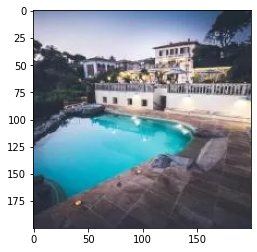

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/images/img_19443.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
import pandas as pd
ds_images = pd.DataFrame(list_images)
ds_images.set_index("hotel_id")
ds_images.head()

,hotel_id,img_file
0,572284,img_572284.jpg
1,82855,img_82855.jpg
2,1166996,img_1166996.jpg
3,460961,img_460961.jpg
4,4768449,img_4768449.jpg


In [ ]:
ds_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   hotel_id  55 non-null     object
 1   img_file  55 non-null     object
dtypes: object(2)
memory usage: 1008.0+ bytes


In [ ]:
ds_images.to_csv("ds_images_agosto1.csv")

In [ ]:
!zip -r "/content/images.zip" "/content/images/"

  adding: content/images/ (stored 0%)
  adding: content/images/img_2427590.jpg (stored 0%)
  adding: content/images/img_82855.jpg (stored 0%)
  adding: content/images/img_268462.jpg (stored 0%)
  adding: content/images/img_83887.jpg (stored 0%)
  adding: content/images/img_1972372.jpg (stored 0%)
  adding: content/images/img_377398.jpg (stored 0%)
  adding: content/images/img_4301121.jpg (stored 0%)
  adding: content/images/img_80200.jpg (stored 0%)
  adding: content/images/img_81430.jpg (stored 0%)
  adding: content/images/img_88076.jpg (stored 0%)
  adding: content/images/img_85797.jpg (stored 0%)
  adding: content/images/img_460961.jpg (stored 0%)
  adding: content/images/img_5609562.jpg (stored 0%)
  adding: content/images/img_83547.jpg (stored 0%)
  adding: content/images/img_84488.jpg (stored 0%)
  adding: content/images/img_3278839.jpg (stored 0%)
  adding: content/images/img_1276113.jpg (stored 0%)
  adding: content/images/img_2031640.jpg (stored 0%)
  adding: content/images/im

CLARIFAI

In [ ]:
!pip install clarifai

In [ ]:
from clarifai.rest import ClarifaiApp

# setup your key!!!
clarifai_key = "810cedec3053464a9a7161435f69c318"
app = ClarifaiApp(api_key=clarifai_key)

# and use the general model
model = app.public_models.general_model

In [ ]:
response = model.predict_by_filename("/content/images/img_18794.jpg")

In [ ]:
pprint.pprint(response)

{'outputs': [{'created_at': '2020-07-02T17:06:21.305470360Z',
              'data': {'concepts': [{'app_id': 'main',
                                     'id': 'ai_ccZ7tNd3',
                                     'name': 'illuminated',
                                     'value': 0.9899150729179382},
                                    {'app_id': 'main',
                                     'id': 'ai_n9vjC1jB',
                                     'name': 'light',
                                     'value': 0.9875596761703491},
                                    {'app_id': 'main',
                                     'id': 'ai_WBQfVV0p',
                                     'name': 'city',
                                     'value': 0.9873274564743042},
                                    {'app_id': 'main',
                                     'id': 'ai_FWCjC8jZ',
                                     'name': 'architecture',
                                     'value': 0.985490560

In [ ]:
if(response['status']['description'] == "Ok"):
    for concept in response["outputs"][0]["data"]["concepts"]:
        name = concept["name"]
        value = concept["value"]
        print(name + " " + str(value))

illuminated 0.9899150729179382
light 0.9875596761703491
city 0.9873274564743042
architecture 0.9854905605316162
street 0.9809445142745972
building 0.9761334657669067
urban 0.9731789231300354
hotel 0.9683263301849365
evening 0.9666874408721924
modern 0.9658728241920471
outdoors 0.9649425745010376
travel 0.9587843418121338
expression 0.9509699940681458
no person 0.9509602189064026
dusk 0.950647234916687
house 0.9434216022491455
office 0.9359667301177979
sky 0.9328747987747192
sight 0.9323348999023438
town 0.9275779724121094


In [ ]:
ds_images = pd.read_csv("ds_images_luglio.csv", index_col="project_id")

img_details = []
for project_id, image in tqdm(ds_images.iterrows(), total=ds_images.shape[0]):
  try:
    response = model.predict_by_filename("/content/images/" + image['img_file'])
    if(response['status']['description'] == "Ok"):
      for concept in response["outputs"][0]["data"]["concepts"]:
          name = concept["name"]
          value = concept["value"]
          img_details.append({
            "project_id": project_id,
            "image": image['img_file'],
            "name": name,
            "value": value
          })
  except Exception as e:
    print(e)

print(len(img_details))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.



1560


In [ ]:
import pandas as pd
ds_img_details = pd.DataFrame(img_details)
ds_img_details.set_index("image")
ds_img_details.head()

,project_id,image,name,value
0,353976,img_353976.jpg,horizontal plane,0.997749
1,353976,img_353976.jpg,outdoors,0.995706
2,353976,img_353976.jpg,city,0.987726
3,353976,img_353976.jpg,water,0.985181
4,353976,img_353976.jpg,architecture,0.983850


In [ ]:
ds_img_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   project_id  1560 non-null   int64  
 1   image       1560 non-null   object 
 2   name        1560 non-null   object 
 3   value       1560 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 48.9+ KB


GEOCODING

In [ ]:
import requests
import json

address = "Via Marsiglia 26, Pesaro"
key = "QDtJijTy03kIQIGxttVh92fCYZS5A5gH"
geocode_url = f"http://www.mapquestapi.com/geocoding/v1/address?key={key}&location={address}"
response = requests.get(geocode_url)

import json
geo = json.loads(response.text)
pprint.pprint(response.text)

('{"info":{"statuscode":0,"copyright":{"text":"\\u00A9 2020 MapQuest, '
 'Inc.","imageUrl":"http://api.mqcdn.com/res/mqlogo.gif","imageAltText":"\\u00A9 '
 '2020 MapQuest, '
 'Inc."},"messages":[]},"options":{"maxResults":-1,"thumbMaps":true,"ignoreLatLngInput":false},"results":[{"providedLocation":{"location":"Via '
 'Marsiglia 26, Pesaro"},"locations":[{"street":"Via '
 'Marsiglia","adminArea6":"","adminArea6Type":"Neighborhood","adminArea5":"Pesaro","adminArea5Type":"City","adminArea4":"PU","adminArea4Type":"County","adminArea3":"MAR","adminArea3Type":"State","adminArea1":"IT","adminArea1Type":"Country","postalCode":"61121","geocodeQualityCode":"B1AAX","geocodeQuality":"STREET","dragPoint":false,"sideOfStreet":"N","linkId":"0","unknownInput":"","type":"s","latLng":{"lat":43.892429,"lng":12.896724},"displayLatLng":{"lat":43.892429,"lng":12.896724},"mapUrl":"http://www.mapquestapi.com/staticmap/v5/map?key=QDtJijTy03kIQIGxttVh92fCYZS5A5gH&type=map&size=225,160&locations=43.8924291,12.8

In [ ]:
print(geo['results'][0]['locations'][0]['latLng']['lat'])
print(geo['results'][0]['locations'][0]['latLng']['lng'])

43.892429
12.896724


In [ ]:
ds_hotel = pd.read_csv("ds_hotel_details_address1.csv", index_col="hotel_id")
ds_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 82855 to 572284
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  295 non-null    int64 
 1   address     295 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.9+ KB


In [ ]:
ds_hotel = pd.read_csv("ds_hotel_details_address1.csv", index_col="hotel_id")

import time
hotel_location = []
for hotel_id, hotel in tqdm(ds_hotel.iterrows(), total=ds_hotel.shape[0]):
  geocod = hotel['address']
  if(geocod is None):# or geocod == NaN):
    print(str(hotel_id) + "- " + hotel['address'])
  else:
    key = "r3xgNwBAviBMdOj4Op90kvyy2iO1CDGz"
    try:
      geocode_url = f"http://www.mapquestapi.com/geocoding/v1/address?key={key}&location={geocod}"
      response = requests.get(geocode_url)
      if(response.status_code == 200):
        geo = json.loads(response.text)
        lat = geo['results'][0]['locations'][0]['latLng']['lat']
        lng = geo['results'][0]['locations'][0]['latLng']['lng']
        hotel_location.append({
              "hotel_id": hotel_id,
              "lat": lat,
              "lng": lng
            })
    except Exception as e:
      print(e)
    

print(len(hotel_location))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """



295


In [ ]:
import pandas as pd
ds_hotel_location = pd.DataFrame(hotel_location)
ds_hotel_location.set_index("hotel_id")
ds_hotel_location.head(20)

,hotel_id,lat,lng
0,82855,43.73789,10.43343
1,4944541,43.47165,11.14547
2,88393,37.66666,12.78959
3,355785,43.98254,11.21285
4,480073,43.87809,11.10123
5,3278485,43.87743,11.15911
6,80651,43.77808,11.25356
7,24998,43.77433,11.25055
8,80746,43.70984,10.40303
9,80574,43.77376,11.24314


In [ ]:
ds_hotel_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hotel_id  295 non-null    int64  
 1   lat       295 non-null    float64
 2   lng       295 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 7.0 KB


In [ ]:
ds_hotel_location.to_csv('ds_hotel_location1.csv')